In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from matplotlib import rcParams

#set the default plot parameter
plt_param={'lines.linewidth':1,
           'xtick.labelsize':12,
           'ytick.labelsize':12,
           'axes.labelsize':16,
           'xtick.direction':'in',
           'ytick.direction':'in',
           'font.style':'italic',
           'font.weight':'normal',
           'figure.figsize':[5,5],'xtick.minor.visible':True,
           'ytick.minor.visible':True,
           'xtick.major.size':4,
           'ytick.major.size':4,
           'xtick.minor.size':2,
           'ytick.minor.size':2,
           'xtick.major.width':.8,
           'ytick.major.width':.8,
           'xtick.top':True,
           'ytick.right':True,
           'axes.spines.bottom':True,
           'axes.spines.top':True,
           'axes.spines.left':True,
           'axes.spines.right':True,
           'xtick.bottom':True,
           'xtick.labelbottom':True,
           'ytick.left':True,
           'ytick.labelleft':True}
rcParams.update(plt_param)

In [22]:
L_AGN=8e11*u.M_sun/u.yr
m_out_up=73206.2846526296
m_out_low=500
m_out=(10**((np.log10(m_out_up)+np.log10(m_out_low))/2.))*u.M_sun/u.yr
P_out=(m_out*300*u.km /u.s).to(u.erg/u.m)

L_AGN=(2.2e12*u.L_sun).to(u.erg/u.s)
P_radiation=(L_AGN/const.c).to(u.erg/u.m)

ratio=P_out/P_radiation

In [23]:
L_AGN.to(u.erg/u.s)

<Quantity 8.4216e+45 erg / s>

In [24]:
ratio

<Quantity 40.71203318>

In [11]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/analysis results/'
ratio_list=np.genfromtxt(dic+'momentum_ratio.txt',delimiter=',')

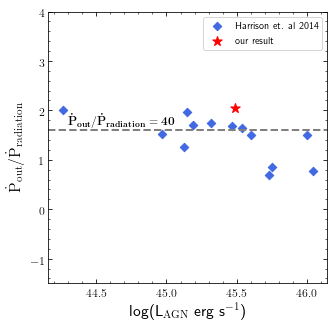

In [32]:
fig,ax=plt.subplots(1,1)
savedic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
ax.scatter(ratio_list[:,0],ratio_list[:,1],marker='D',
           color='royalblue',label='Harrison et. al 2014')
ax.scatter(np.log10(L_AGN.value),np.log10(ratio),marker='*',
           color='red',label='our result',s=100)
ax.set_ylim(-1.5,4)
ax.axhline(np.log10(40),color='gray',ls='--',lw=2)
ax.text(44.3,np.log10(40)+.08,
        r'$$\rm \bf{{\dot{P}}_{\rm \bf{out}}/\dot{P}_{\rm \bf{radiation}}=40}$$',fontsize=12)
ax.set_xlabel(r'log(L$_{\rm AGN}$ erg s$^{-1}$)')
ax.set_ylabel(r'$$\rm \dot{P}_{\rm out}/\dot{P}_{\rm radiation}$$')
plt.legend()
# plt.show()
plt.savefig(savedic+'momentum_ratio.png',dpi=300)